# PyTorch Assignment: Convolutional Neural Network (CNN)

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Abhinav Tembulkar

### Convolutional Neural Network

Adapt the CNN example for MNIST digit classfication from Notebook 3A. 
Feel free to play around with the model architecture and see how the training time/performance changes, but to begin, try the following:

Image ->  
convolution (32 3x3 filters) -> nonlinearity (ReLU) ->  
convolution (32 3x3 filters) -> nonlinearity (ReLU) -> (2x2 max pool) ->  
convolution (64 3x3 filters) -> nonlinearity (ReLU) ->  
convolution (64 3x3 filters) -> nonlinearity (ReLU) -> (2x2 max pool) -> flatten ->
fully connected (256 hidden units) -> nonlinearity (ReLU) ->  
fully connected (10 hidden units) -> softmax 

Note: The CNN model might take a while to train. Depending on your machine, you might expect this to take up to half an hour. If you see your validation performance start to plateau, you can kill the training.

In [83]:

import torch
import torch.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from tqdm.notebook import tqdm

train = torchvision.datasets.MNIST(root='./datasets/', transform=torchvision.transforms.ToTensor(), download=True, train=True)
test = torchvision.datasets.MNIST(root='./datasets/', transform=torchvision.transforms.ToTensor(), download=True, train=False)

train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

# Defining Model

In [84]:

class CNN(nn.Module):
	def __init__(self):
		super().__init__()

		self.layers = nn.Sequential(
			nn.Conv2d(1, 32, kernel_size=3),
			nn.ReLU(),
			nn.Conv2d(32, 32, kernel_size=3),
			nn.ReLU(),
			nn.MaxPool2d(kernel_size=2),
			nn.Conv2d(32, 64, kernel_size=3),
			nn.ReLU(),
			nn.Conv2d(64, 64, kernel_size=3),
			nn.ReLU(),
			nn.MaxPool2d(kernel_size=2),
			nn.Flatten(),
			nn.Linear(1024, 256),
			nn.ReLU(),
			nn.Linear(256, 10)
			)

	def forward(self, x):
		out = self.layers(x)
		return out

# Training

EPOCH: 1


  0%|          | 0/600 [00:00<?, ?it/s]

EPOCH: 2


  0%|          | 0/600 [00:00<?, ?it/s]

EPOCH: 3


  0%|          | 0/600 [00:00<?, ?it/s]

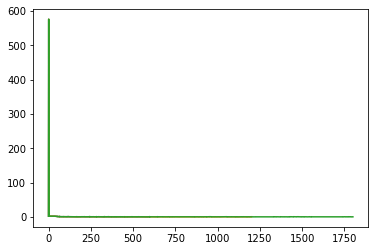

In [85]:
model = CNN()
optimizer = torch.optim.Adam(params=model.parameters(), lr=.05)
loss_fn = torch.nn.CrossEntropyLoss()
loss_arr = []

for epoch in range (3):

	print(f'EPOCH: {epoch+1}')

	for train, test in tqdm(train_loader):
		optimizer.zero_grad()
		x = train
		y = model(x)
		loss = loss_fn(y, test)
		loss_arr.append(loss)
		loss.backward()
		optimizer.step()
	x_steps = torch.linspace(0, len(loss_arr), len(loss_arr))
	plt.plot(x_steps, list(map(lambda x: x.detach().numpy(), loss_arr)))


In [91]:
#model = CNN()
#model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

Layer 1 Kernels


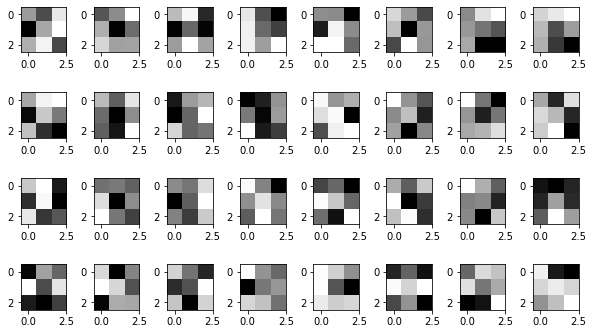

In [93]:
fig, ax = plt.subplots(nrows=4, ncols=8)
fig.set_size_inches(10, 10)
fig.subplots_adjust(hspace=-.7, wspace=.6)

for i, img in enumerate(next(model.parameters ())):
	try:
		img = img.view(3, 3)
		row = i // 8
		col = i % 8 
		ax[row][col].imshow(img.detach().numpy(), cmap='gray')
	except:
		print(i)

print('Layer 1 Kernels')


Final layer feature maps


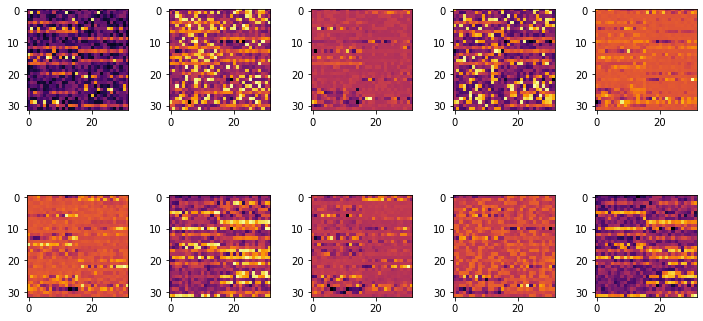

In [94]:
layer11 = model.state_dict()['layers.11.weight']
layer11 = layer11.view(-1, 32, 32)
layer11 = layer11[:10]

fig, ax = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(12, 12)
plt.subplots_adjust(wspace=.4)
plt.subplots_adjust(hspace =-.6)

for i, im in enumerate(layer11):
	row = i // 5
	col = i % 5
	ax[row][col].imshow(im, cmap='inferno')	

print('Final layer feature maps')

Accuracy: 99.0%


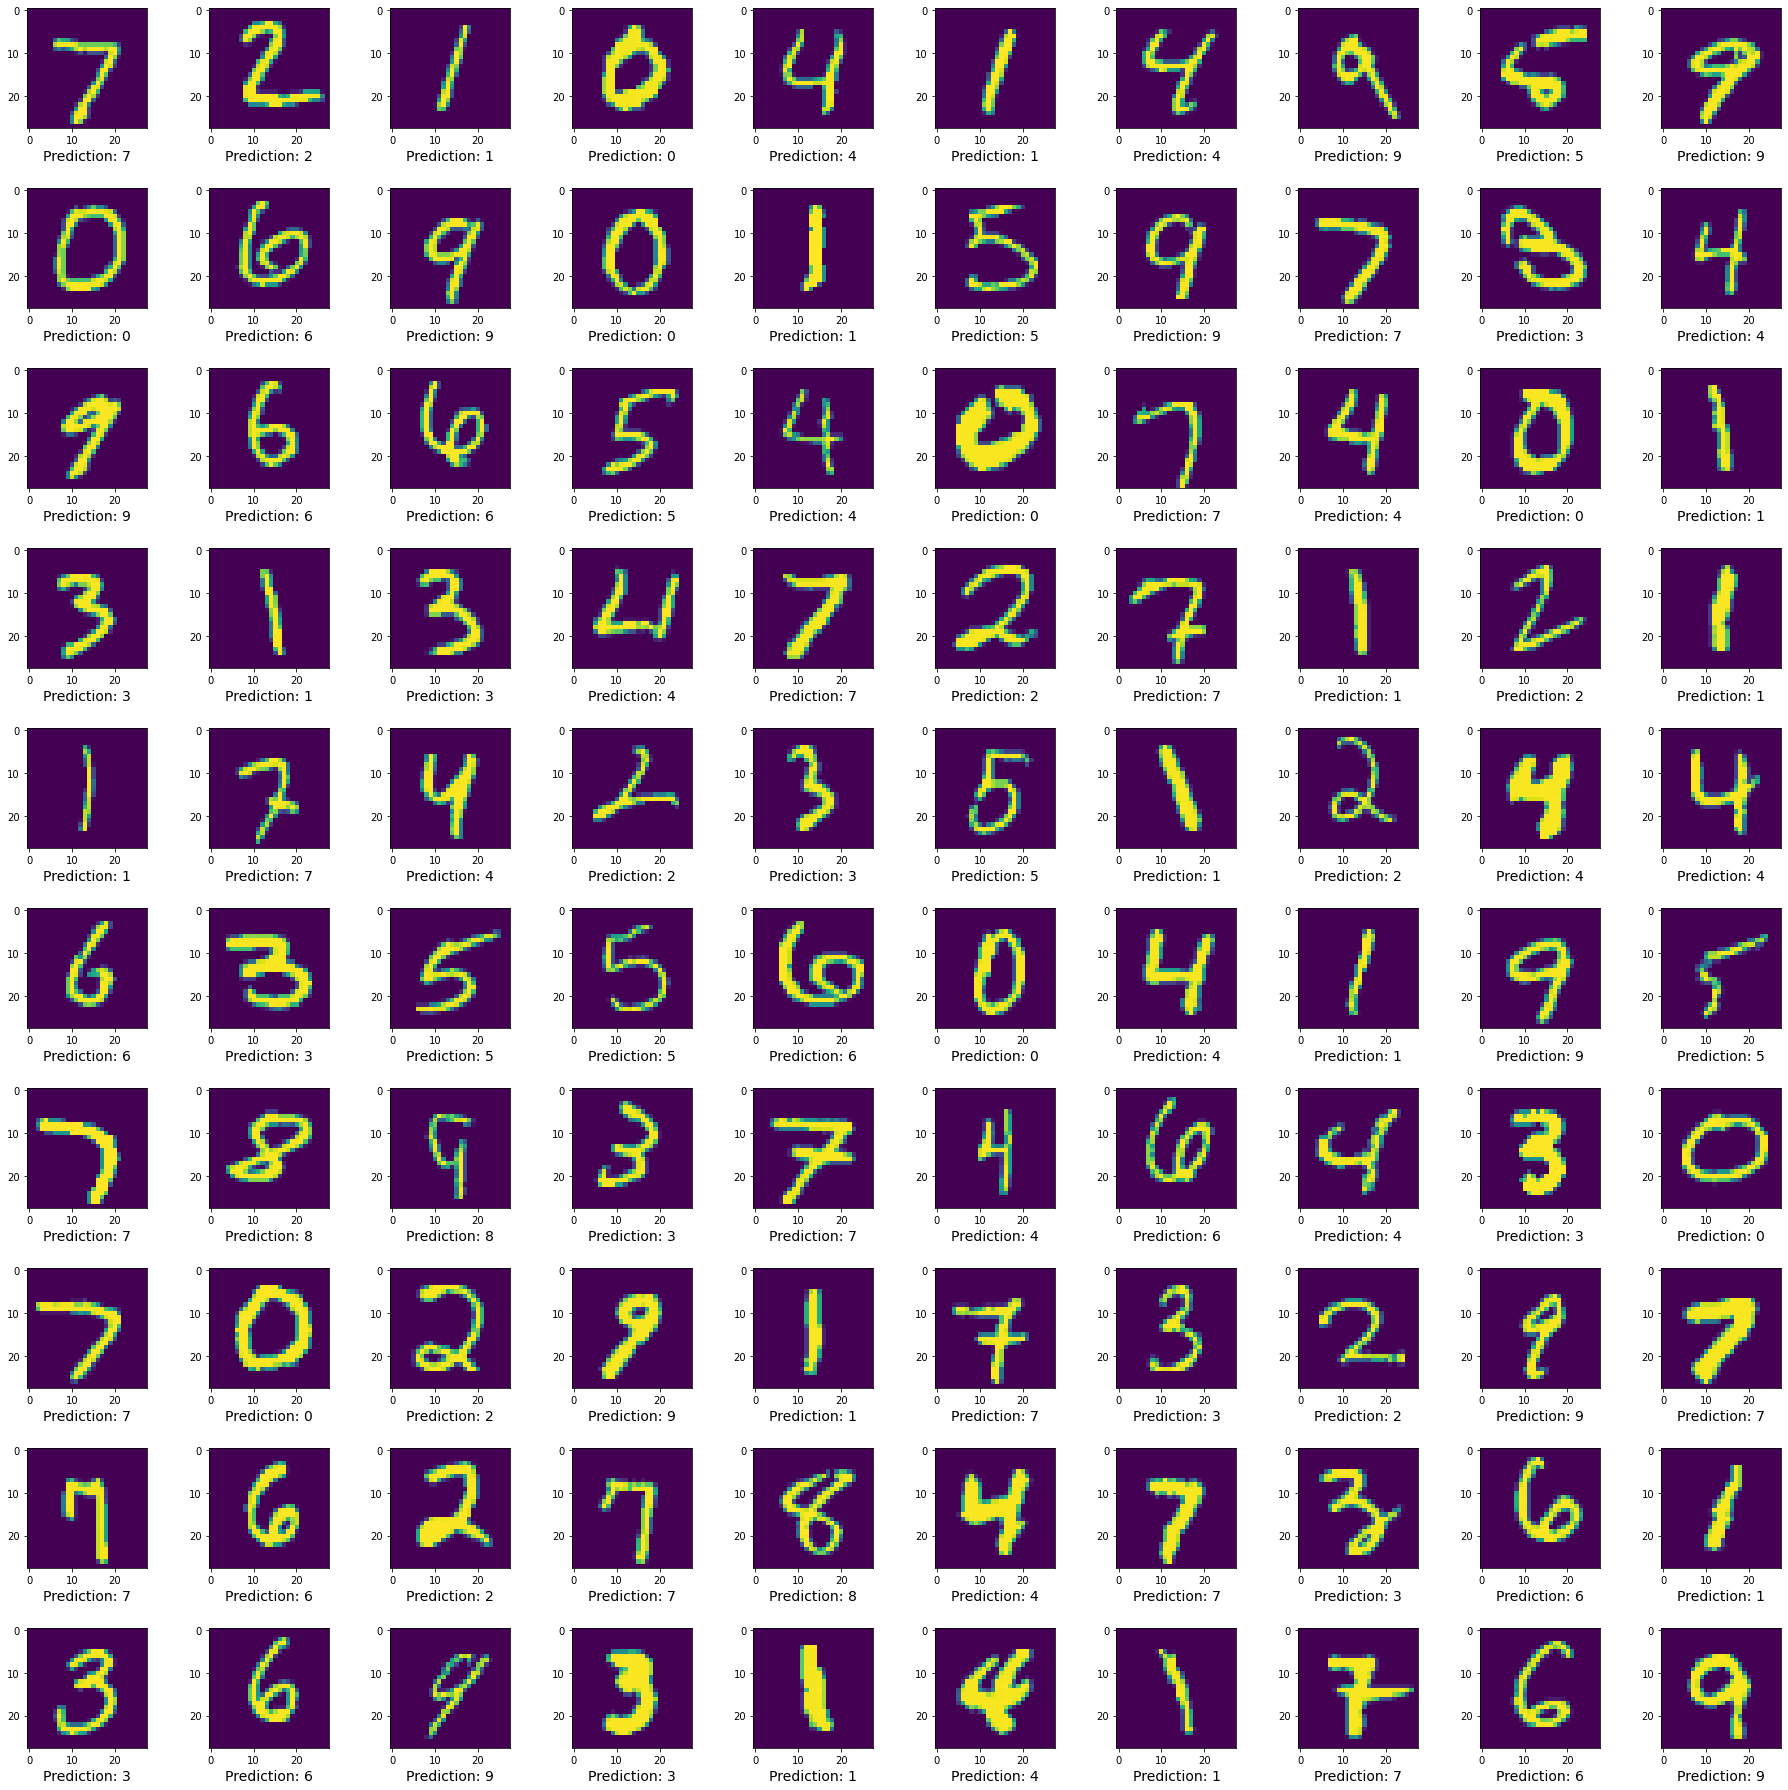

In [92]:
x_test, y_test = next(iter(test_loader))
predictions = model(x_test)
predictions = torch.argmax(predictions, dim=1)

x_test = x_test.view(-1, 28, 28)

fig, ax = plt.subplots(nrows=10, ncols=10)
fig.set_size_inches(32, 32)
fig.subplots_adjust(hspace=.5)

count = 0
for index, im in enumerate(x_test):
	row = index // 10
	col = index%10
	ax[row][col].imshow(im)
	ax[row][col].set_xlabel(f'Prediction: {predictions[index]}', fontsize=14)
	if(y_test[index] == predictions[index]):
		count += 1

print(f'Accuracy: {(count/100)*100}%')